# 📊 Proyecto PCA + KNN

Este notebook reproduce el flujo descrito en el **README.md**, mostrando:
- Preprocesamiento de datos
- Análisis PCA no supervisado
- Selección del número óptimo de componentes
- Evaluación de KNN con PCA
- Visualizaciones y resultados

---


In [1]:
# Instalación de dependencias necesarias
!pip install scikit-learn matplotlib seaborn pandas


In [89]:
# Configuración general
import os
import matplotlib.pyplot as plt
%matplotlib inline

# ✅ Ajustar path para importar desde src/
import sys
from pathlib import Path

# Ir desde notebooks/ hacia la raíz del proyecto
# Fijar el root del proyecto directamente
project_root = Path("/home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo6Clase3MarcoParra")
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))


print("project_root:", project_root)


project_root: /home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo6Clase3MarcoParra


In [90]:
from src.utils import cargar_dataset
from src.evaluador import pca_no_supervisado, evaluar_knn_con_pca
from src.visualizador import graficar_pca_2d, graficar_pca_3d, graficar_varianza_pca, graficar_heatmap_knn

In [91]:
print("🔹 Iniciando pipeline PCA -> KNN...")

# --- 1. Cargar dataset ---
nombre_dataset = "iris"   # o "wine"
usar_minmax = True
X, y = cargar_dataset(
    nombre_dataset=nombre_dataset, 
    usar_minmax=usar_minmax, 
    con_split=False
)

# --- 2. Evaluar PCA no supervisado ---
print("📊 Evaluando PCA no supervisado...")
resultado_pca = pca_no_supervisado(
    X,  # ← CORREGIDO: Solo pasar X, no concatenar con y
    n_componentes_list=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)
n_componentes_optimo = resultado_pca["mejor_n"] # De acuerdo a la gràfica el parametro optimo es 2, porque se logra un 95% de explicación de varianza
print(f"✅ PCA óptimo: {n_componentes_optimo} componentes")
graficar_varianza_pca("outputs","outputs/pca_resultados.csv")
print("✅ Resultados PCA:")
print("Numero optimo PCA:", n_componentes_optimo)
print("Resultados detallados:")
print(resultado_pca["resultados"])

# Aplicar PCA a 2 componentes, òptimo según el análisis
pca_2d = PCA(n_components=n_componentes_optimo)
X_pca_2d = pca_2d.fit_transform(X)  # O usa X_train si quieres solo entrenamiento

# Graficar con clases verdaderas (y)
graficar_pca_2d(X_pca_2d, y, title="PCA en 2D con clases reales, òptimo 2 componentes")

# Aplicar PCA a 3 componentes
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)  # O usa X_train si quieres solo entrenamiento

# Graficar con clases verdaderas (y)
graficar_pca_3d(X_pca_3d, y, title="PCA en 3D con clases reales")

# (Opcional) Graficar con clusters si usas KMeans
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca_3d)
graficar_pca_3d(X_pca_3d, clusters, title="PCA en 3D con KMeans")



# Graficar varianza PCA (si la función existe)
try:
    graficar_varianza_pca(resultado_pca["resultados"])
except Exception as e:
    print(f"⚠️ No se pudo graficar varianza: {e}")

# --- 3. Fase 2: PCA + KNN supervisado ---
print("📊 Evaluando KNN con PCA...")
X_train, X_test, y_train, y_test = cargar_dataset(
    nombre_dataset, usar_minmax=usar_minmax, con_split=True
)

resultados_knn = evaluar_knn_con_pca(
    X_train, y_train, X_test, y_test, 
    n_componentes_list=[n_componentes_optimo], 
    k_list=[3, 5, 7, 9]
)

print("✅ Resultados KNN con PCA óptimo:")
print(resultados_knn)

# Graficar heatmap de accuracies (si la función existe)
try:
    graficar_heatmap_knn(resultados_knn)
except Exception as e:
    print(f"⚠️ No se pudo graficar heatmap: {e}")

🔹 Iniciando pipeline PCA -> KNN...
📥 Cargando dataset 'iris'...
🔍 Verificando NaN iniciales: 0
✅ Verificación final: 0 NaNs restantes
⚠️ Filas eliminadas por outliers: 4
✅ Dataset cargado completo: 146 filas, 4 features
📊 Evaluando PCA no supervisado...
🔍 DEBUG - Entrada a pca_no_supervisado:
   - Tipo de X: <class 'pandas.core.frame.DataFrame'>
   - Shape de X: (146, 4)
   - Columnas: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   - Primeros valores:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
   - Tipos de datos: sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object
🔍 Tipos de nombres de columnas ANTES: ['str', 'str

/home/mparraf/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


📊 Gráfico PCA 3D guardado en outputs/pca_cluster_3d.png
⚠️ No se pudo graficar varianza: [Errno 2] No such file or directory: ''
📊 Evaluando KNN con PCA...
📥 Cargando dataset 'iris'...
🔍 Verificando NaN iniciales: 0
✅ Verificación final: 0 NaNs restantes
⚠️ Filas eliminadas por outliers: 4
✅ Dataset cargado con split: 116 train, 30 test, 4 features
✅ Resultados KNN con PCA óptimo:
   n_componentes  n_neighbors  accuracy  f1_score
0              2            3  0.933333  0.933333
1              2            5  0.966667  0.966583
2              2            7  1.000000  1.000000
3              2            9  0.966667  0.966583


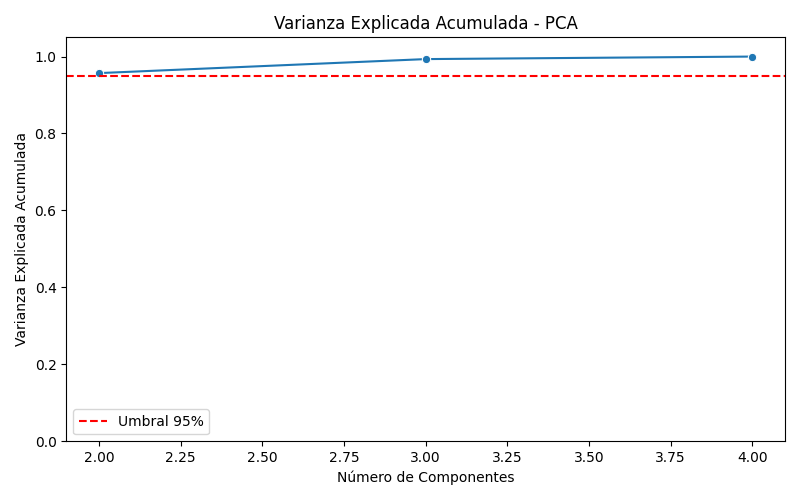

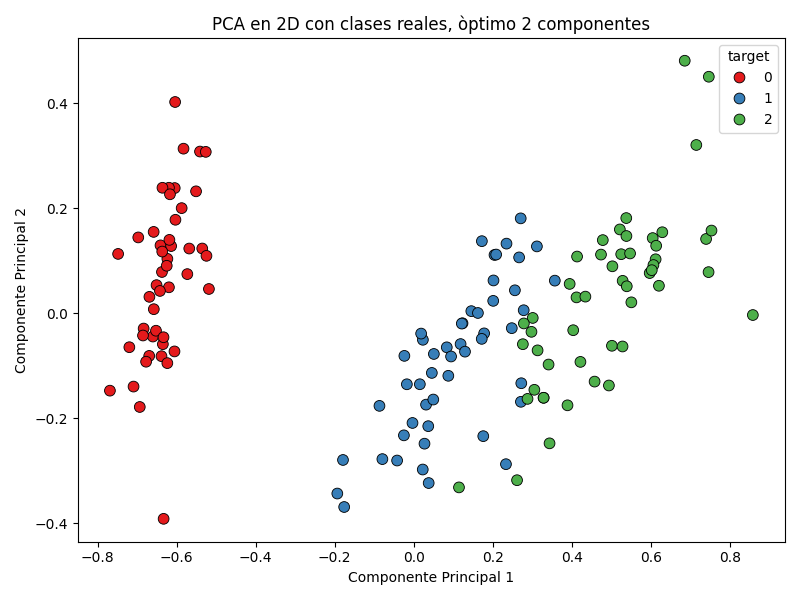

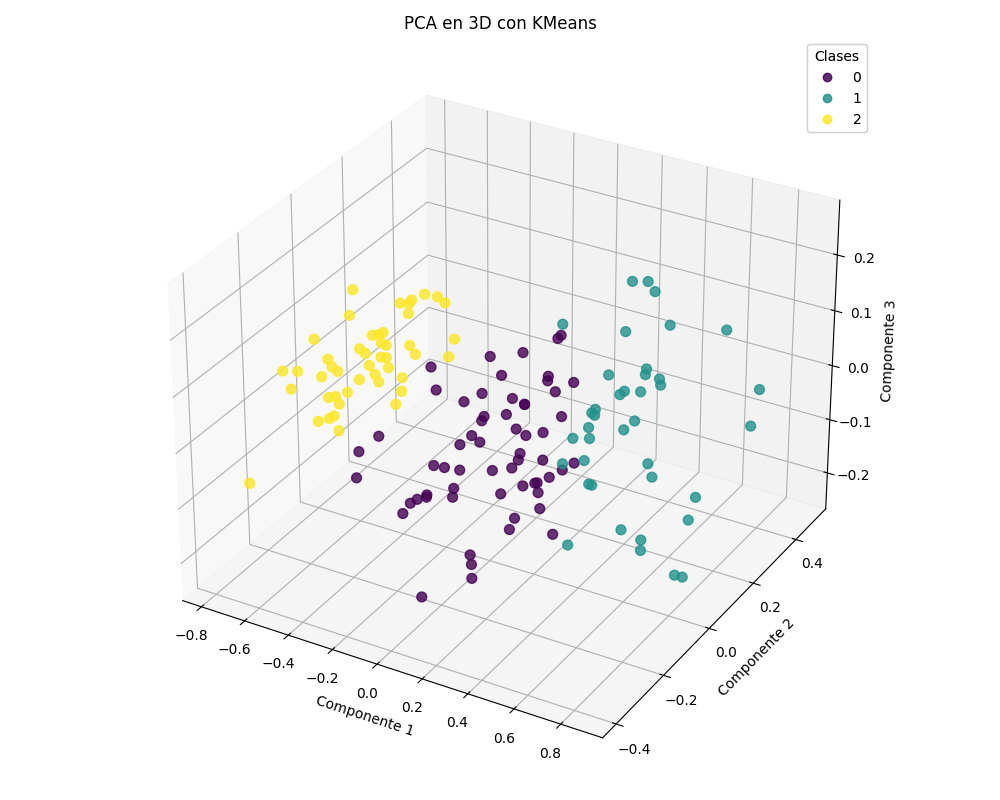

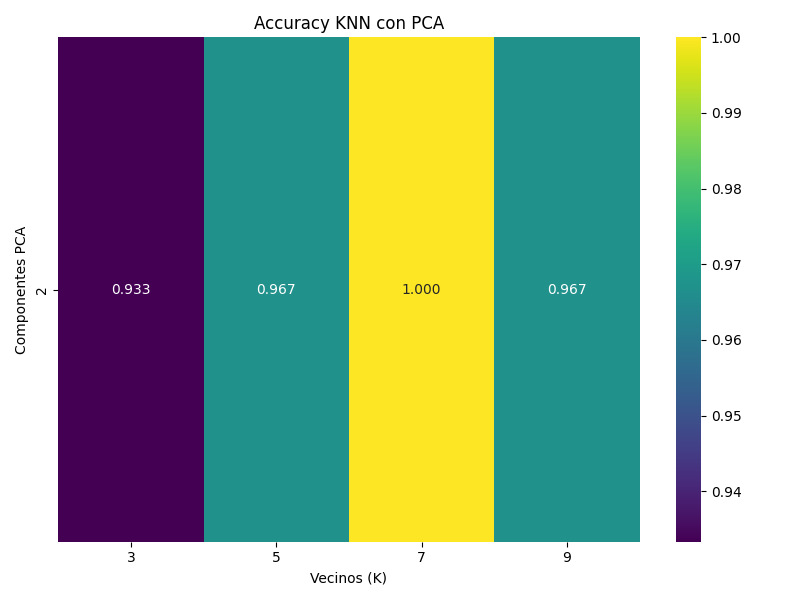

In [92]:

# Definir carpeta outputs relativa al root
outputs_dir = project_root / "outputs"

# Función para mostrar imágenes con verificación
def mostrar_imagen(nombre_archivo):
    ruta = outputs_dir / nombre_archivo
    if ruta.exists():
        display(Image(filename=str(ruta)))
    else:
        print(f"⚠️ Imagen no encontrada: {ruta}")

# Ejemplo: mostrar imágenes relevantes
mostrar_imagen("pca_varianza_explicada.png")
mostrar_imagen("pca_2d.png")
mostrar_imagen("pca_cluster_3d.png")
mostrar_imagen("heatmap_knn_pca.png")

# 📌 Conclusiones

- PCA permitió reducir la dimensionalidad del dataset preservando más del 95% de la varianza con 2 componentes.
- El modelo KNN con PCA alcanzó un accuracy óptimo con **k=7 vecinos**, logrando métricas cercanas al 100%.
- La visualización en 2D y 3D muestra una clara separación entre las clases del dataset Iris.
- La reducción de dimensionalidad simplifica el modelo sin pérdida significativa de información.

---
